# Comparison Analysis of Online Streaming Platforms

The dataset is gained through scraping the contents from reelgood.com on July, 20, 2020

# 1. Preprocessing

### 1.1 Read the Dataset and Reorder the Columns

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("./streamingsites/streamingsites2.csv")

In [2]:
col_order = ["web_name","movie_or_tv", "title", "year_start", "year_end",\
             "seasons", "imdb_score", "rg_score", "rated", "genres"]
data = data[col_order]

In [3]:
print(data.shape)
data.head()

(27305, 10)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,genres
0,netflix,show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),"animation,action-and-adventure,comedy,drama,fa..."
1,netflix,movie,The Other Side of the Wind,2018,NaN,NaN,6.8,68.0,18+ (R),"comedy,independent,drama"
2,netflix,show,Patriot Act with Hasan Minhaj,2018,2020.0,6.0,8.2,69.0,18+ (TV-MA),comedy
3,netflix,show,Formula 1: Drive to Survive,2019,2020.0,2.0,8.6,69.0,14+ (TV-14),"documentary,sport"
4,netflix,movie,Tamasha,2015,NaN,NaN,7.3,70.0,7+ (PG),"comedy,drama,romance"


### 1.2 Changing the data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27305 entries, 0 to 27304
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   web_name     27305 non-null  object 
 1   movie_or_tv  27305 non-null  object 
 2   title        27305 non-null  object 
 3   year_start   27305 non-null  int64  
 4   year_end     6147 non-null   float64
 5   seasons      6147 non-null   float64
 6   imdb_score   25242 non-null  float64
 7   rg_score     26708 non-null  float64
 8   rated        13156 non-null  object 
 9   genres       25495 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [5]:
data.loc[data['year_end'].notnull(), 'year_end'] = data.loc[data['year_end'].notnull(), 'year_end'].apply('int64')
data.loc[data['seasons'].notnull(), 'seasons'] = data.loc[data['seasons'].notnull(), 'seasons'].apply('int64')
data.loc[data['rg_score'].notnull(), 'rg_score'] = data.loc[data['rg_score'].notnull(), 'rg_score'].apply('int64')

### 1.3 Rename the unique genres and change from string to list

In [6]:
data['genres'] = data['genres'].astype(str)
genres = list(map(lambda x: x.split(','), data['genres'].tolist()))
unique_genres = list(set([genre for row in genres for genre in row]))
sorted(unique_genres)

['action & adventure',
 'action-and-adventure',
 'animation',
 'anime',
 'biography',
 'children',
 'comedy',
 'crime',
 'cult',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'food',
 'game show',
 'game-show',
 'history',
 'home & garden',
 'home-and-garden',
 'horror',
 'independent',
 'lgbtq',
 'musical',
 'mystery',
 'nan',
 'reality',
 'romance',
 'science-fiction',
 'sport',
 'stand-up & talk',
 'stand-up-and-talk',
 'thriller',
 'travel']

In [7]:
data['genres'] = data['genres'].str.replace('action-and-adventure','action & adventure')
data['genres'] = data['genres'].str.replace('game-show','game show')
data['genres'] = data['genres'].str.replace('home-and-garden','home & garden')
data['genres'] = data['genres'].str.replace('stand-up-and-talk','stand-up & talk')

In [8]:
# Changing the column of genres from string to lists
data['genres'] = data['genres'].apply(lambda x: x.split(','))

### 1.4 Capitalize the texts

In [9]:
data['web_name'] = list(map(lambda x: x.capitalize(),data['web_name']))
data['movie_or_tv'] = list(map(lambda x: x.capitalize(),data['movie_or_tv']))
data['genres'] = list(map(lambda rows: list(map(lambda x: x.capitalize(), rows)), data['genres']))

### 1.5 Rename web name

In [10]:
data['web_name'] = data['web_name'].str.replace('Hbo_max', "HBO Max")
data['web_name'] = data['web_name'].str.replace('Disney_plus', "Disney Plus")
data['web_name'] = data['web_name'].str.replace('Amazon', "Amazon Prime")

In [11]:
# data.to_csv("preprocesseddata.csv")

# 2. EDA

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style = "whitegrid")

In [13]:
df = data.copy()
print(df.shape)
df.head()

(27305, 10)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,genres
0,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),"[Animation, Action & adventure, Comedy, Drama,..."
1,Netflix,Movie,The Other Side of the Wind,2018,NaN,NaN,6.8,68.0,18+ (R),"[Comedy, Independent, Drama]"
2,Netflix,Show,Patriot Act with Hasan Minhaj,2018,2020.0,6.0,8.2,69.0,18+ (TV-MA),[Comedy]
3,Netflix,Show,Formula 1: Drive to Survive,2019,2020.0,2.0,8.6,69.0,14+ (TV-14),"[Documentary, Sport]"
4,Netflix,Movie,Tamasha,2015,NaN,NaN,7.3,70.0,7+ (PG),"[Comedy, Drama, Romance]"


### Price for each platform

In [14]:
#Price for each platform as of July 20, 2020
membership = pd.DataFrame([["Amazon Prime", 8.99],["Disney Plus", 6.99],\
                           ["HBO Max", 14.99],["Hulu", 11.99],["Netflix", 12.99]], columns = ["web_name", "cost"])
membership

,web_name,cost
0,Amazon Prime,8.99
1,Disney Plus,6.99
2,HBO Max,14.99
3,Hulu,11.99
4,Netflix,12.99


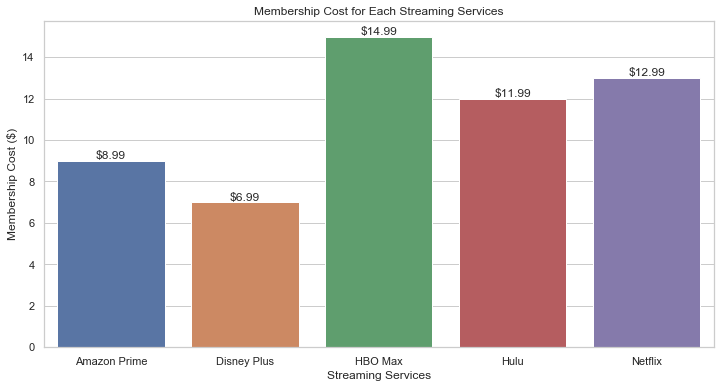

In [15]:
ax = sns.barplot(data = membership, x= "web_name", y = "cost")
plt.title("Membership Cost for Each Streaming Services")
plt.xlabel("Streaming Services")
plt.ylabel("Membership Cost ($)")
for p in ax.patches:
    ax.annotate("$%.2f" % p.get_height(), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Q1. How many contents are in each streaming service?

In [16]:
df_count = df.groupby(["web_name","movie_or_tv"]).size().unstack()
df_count['p_movie'] = round(df_count['Movie']/(df_count['Movie']+df_count['Show'])*100)
df_count['p_tvshow'] = round(df_count['Show']/(df_count['Movie']+df_count['Show'])*100)
df_count

movie_or_tv,Movie,Show,p_movie,p_tvshow
web_name,,,,
Amazon Prime,14067,2136,87.0,13.0
Disney Plus,637,203,76.0,24.0
HBO Max,1747,368,83.0,17.0
Hulu,945,1713,36.0,64.0
Netflix,3762,1727,69.0,31.0


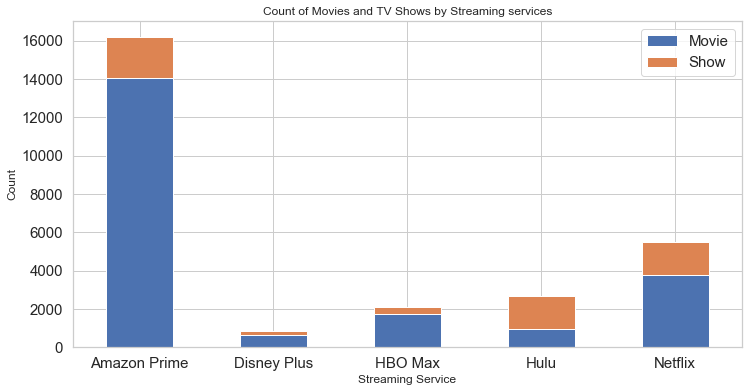

In [17]:
df_count[["Movie","Show"]].plot(kind='bar',stacked=True, rot = 0, fontsize = 15)
plt.title("Count of Movies and TV Shows by Streaming services")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.legend(fontsize = 15)

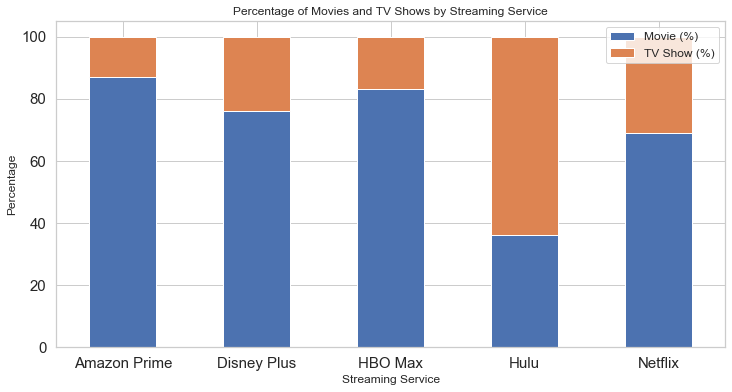

In [18]:
ax = df_count[['p_movie','p_tvshow']].plot(kind='bar',stacked=True, rot = 0, fontsize = 15)
plt.title("Percentage of Movies and TV Shows by Streaming Service")
plt.xlabel("Streaming Service")
plt.ylabel("Percentage")
plt.legend(["Movie (%)","TV Show (%)"], fontsize = 12)

### Q2. How does the distribution of review scores look for each service?

#### With IMDB Score

In [19]:
df.groupby(["web_name","movie_or_tv"])[["imdb_score"]].describe().round(2).iloc[:,1:]

imdb_score                               
                               mean   std  min  25%  50%  75%  max
web_name     movie_or_tv                                          
Amazon Prime Movie             5.77  1.40  1.0  4.9  5.9  6.8  9.4
             Show              7.14  1.14  1.8  6.6  7.3  8.0  9.5
Disney Plus  Movie             6.49  1.02  1.6  5.9  6.5  7.2  9.0
             Show              6.95  1.14  3.3  6.2  7.0  7.9  9.7
HBO Max      Movie             6.81  1.03  1.7  6.2  7.0  7.6  9.3
             Show              7.49  1.08  2.5  7.1  7.7  8.2  9.4
Hulu         Movie             6.16  1.09  1.6  5.5  6.2  7.0  9.3
             Show              7.06  1.19  1.7  6.6  7.3  7.9  9.4
Netflix      Movie             6.25  1.15  1.6  5.5  6.3  7.1  9.3
             Show              7.16  1.10  1.0  6.6  7.3  7.9  9.5

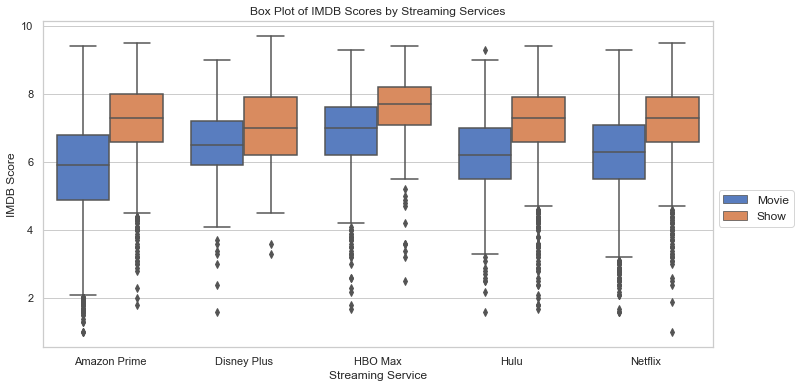

In [20]:
sns.boxplot(data = df, x = "web_name", y = "imdb_score", hue = "movie_or_tv",\
            hue_order = ["Movie","Show"], palette=sns.color_palette("muted"), order=np.sort(df["web_name"].unique()))
plt.title("Box Plot of IMDB Scores by Streaming Services")
plt.xlabel("Streaming Service")
plt.ylabel("IMDB Score")
plt.legend(fontsize = 12, bbox_to_anchor=(1,0.5))

#### With Reelgood Score

In [21]:
df.groupby(["web_name","movie_or_tv"])[["rg_score"]].describe().round(2).iloc[:,1:]

rg_score                                      
                             mean    std   min   25%   50%   75%    max
web_name     movie_or_tv                                               
Amazon Prime Movie          41.71  13.92  10.0  33.0  38.0  49.0   97.0
             Show           39.77  20.08  10.0  22.0  41.0  53.0   92.0
Disney Plus  Movie          61.43  16.60  15.0  48.0  60.0  75.0   96.0
             Show           53.74  13.46  10.0  46.0  54.0  62.0   91.0
HBO Max      Movie          61.92  17.74  10.0  49.0  65.0  76.0   97.0
             Show           60.42  17.28  10.0  50.0  63.0  73.0   99.0
Hulu         Movie          59.48  14.75  11.0  48.0  60.0  71.0  100.0
             Show           54.18  18.11  10.0  45.0  56.0  67.0   97.0
Netflix      Movie          52.88  15.09  10.0  42.0  51.0  63.0   98.0
             Show           55.71  16.18  10.0  45.0  55.0  67.0  100.0

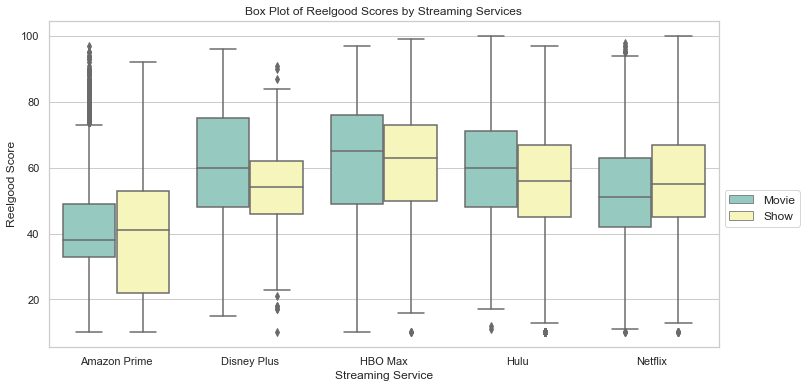

In [22]:
sns.boxplot(data = df, x = "web_name", y = "rg_score", hue = "movie_or_tv",\
            hue_order = ["Movie","Show"], palette="Set3", order=np.sort(df["web_name"].unique()))
plt.title("Box Plot of Reelgood Scores by Streaming Services")
plt.xlabel("Streaming Service")
plt.ylabel("Reelgood Score")
plt.legend(fontsize= 12, bbox_to_anchor=(1,0.5))

### Q3. What are the proportions for quality and high-quality movies and TV shows?

In [23]:
df.groupby("movie_or_tv")["imdb_score"].describe()
# Let's say movies or TV shows with above 50% of the imdb_score are considered quality.
# And, anything above the 75% of the imdb_score is considered high quality.

,count,mean,std,min,25%,50%,75%,max
movie_or_tv,,,,,,,,
Movie,20275.0,5.985874,1.345793,1.0,5.2,6.2,7.0,9.4
Show,4967.0,7.143145,1.141777,1.0,6.6,7.3,7.9,9.7


In [24]:
# Make the movies and TV shows into two separate dataframes
groups = df.groupby("movie_or_tv")
df_movie = pd.DataFrame(groups).iloc[0,1]
df_tv = pd.DataFrame(groups).iloc[1,1]

In [25]:
# Total, High Quality and Quality Movies
total_movie = df_movie.groupby("web_name").size()
Q_movie = df_movie.loc[df_movie["imdb_score"] >= 6.2,].groupby("web_name").size()
HQ_movie = df_movie.loc[df_movie["imdb_score"] >= 7.0,].groupby("web_name").size()

# Total, High Quality and Quality TV Shows
total_tv = df_tv.groupby("web_name").size()
Q_tv = df_tv.loc[df_tv["imdb_score"] >= 7.3,].groupby("web_name").size()
HQ_tv = df_tv.loc[df_tv["imdb_score"] >= 7.9,].groupby("web_name").size()

### Quality Movies

In [26]:
movies = pd.concat([total_movie, Q_movie, HQ_movie], axis = 1,\
                   keys= ["Total Movies","Quality Movies","High Quality Movies"]).reset_index()
movies

,web_name,Total Movies,Quality Movies,High Quality Movies
0,Amazon Prime,14067,5912,2847
1,Disney Plus,637,417,217
2,HBO Max,1747,1299,850
3,Hulu,945,499,243
4,Netflix,3762,2124,1068


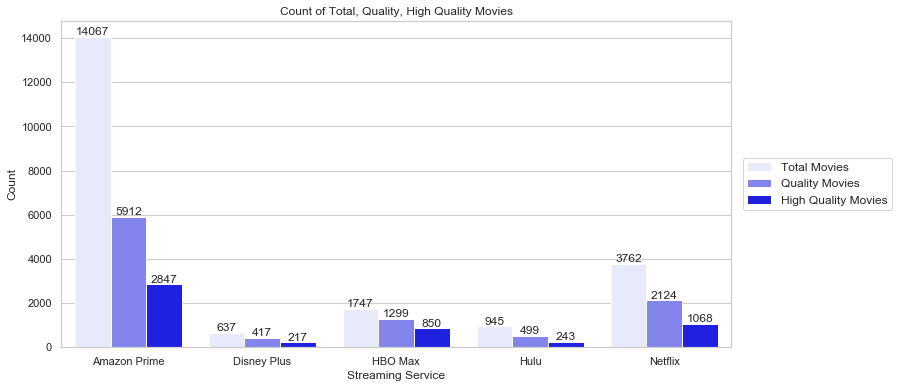

In [27]:
x = pd.DataFrame(movies.set_index("web_name").stack()).reset_index().rename(columns = {0:"count"})
ax = sns.barplot(data = x, x = "web_name", y = "count", hue = "level_1", color = "blue")
plt.title("Count of Total, Quality, High Quality Movies")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.legend(fontsize= 12, bbox_to_anchor=(1.25,0.6))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

In [28]:
tvshows = pd.concat([total_tv, Q_tv, HQ_tv], axis = 1,\
                    keys= ["Total TV Shows","Quality TV Shows","High Quality TV Shows"]).reset_index()
tvshows

,web_name,Total TV Shows,Quality TV Shows,High Quality TV Shows
0,Amazon Prime,2136,712,380
1,Disney Plus,203,78,51
2,HBO Max,368,236,157
3,Hulu,1713,767,385
4,Netflix,1727,880,467


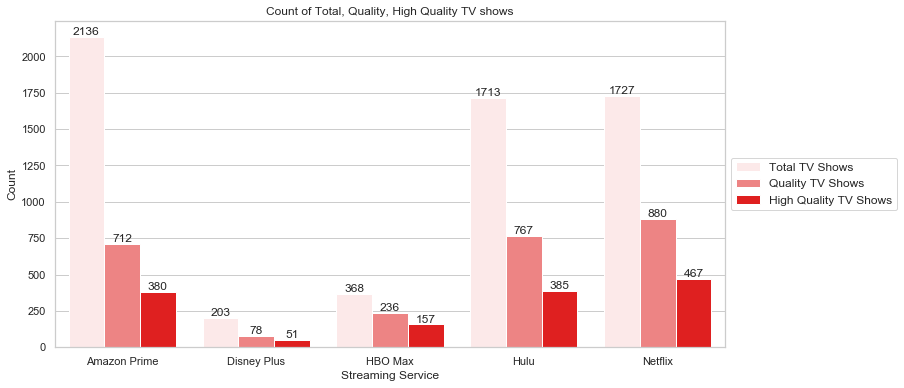

In [29]:
x = pd.DataFrame(tvshows.set_index("web_name").stack()).reset_index().rename(columns = {0:"count"})
ax = sns.barplot(data = x, x = "web_name", y = "count", hue = "level_1", color = "red")
plt.title("Count of Total, Quality, High Quality TV shows")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.legend(fontsize= 12, bbox_to_anchor=(1,0.6))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Q4. What genres are popular?

In [30]:
df_genre = df.copy()

In [31]:
index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genres:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre['genres'] = genre['genres'].apply(lambda x: x.strip("'"))
genre

,index,genres
0,0,Animation
1,0,Action & adventure
2,0,Comedy
3,0,Drama
4,0,Family
...,...,...
72412,27302,Documentary
72413,27303,Nan
72414,27304,Action & adventure
72415,27304,Comedy


In [32]:
df_genre = pd.merge(df_genre.drop('genres', axis=1), genre, how='right', left_index=True, right_on='index')
print(df_genre.shape)
df_genre.head()

(72417, 11)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,index,genres
0,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),0,Animation
1,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),0,Action & adventure
2,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),0,Comedy
3,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),0,Drama
4,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),0,Family


In [43]:
df_genre.loc[df_genre["genres"] == "Travel"]

,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,index,genres
1828,Netflix,Show,The Chef Show,2019,2020.0,2.0,8.2,72.0,18+ (TV-MA),508,Travel
9527,Amazon Prime,Show,Bump!,2005,2010.0,5.0,5.7,32.0,NaN,4473,Travel
11633,Amazon Prime,Movie,Steep & Deep,1985,NaN,NaN,7.3,33.0,NaN,5385,Travel
12804,Amazon Prime,Movie,There Comes a Time,1975,NaN,NaN,NaN,33.0,NaN,5890,Travel
13999,Amazon Prime,Show,Curious Traveler,2015,2020.0,3.0,7.8,34.0,NaN,6430,Travel
...,...,...,...,...,...,...,...,...,...,...,...
65926,Netflix,Show,Somebody Feed Phil,2018,2020.0,3.0,8.1,65.0,14+ (TV-14),25191,Travel
68080,HBO Max,Show,The Misadventures of Romesh Ranganathan,2018,2020.0,2.0,7.9,45.0,NaN,25897,Travel
69327,HBO Max,Show,Top Gear,2002,2020.0,28.0,8.7,78.0,7+ (TV-PG),26377,Travel
70483,HBO Max,Movie,Hostel,2006,NaN,NaN,5.9,71.0,18+ (R),26728,Travel


Text(0, 0.5, 'Count')

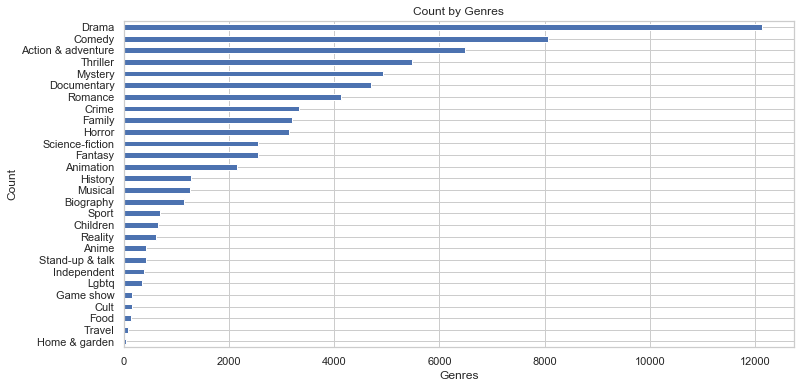

In [60]:
df_genre.loc[df_genre["genres"] != "Nan"].groupby('genres').size().sort_values().plot.barh()
plt.title("Count by Genres")
plt.xlabel('Genres')
plt.ylabel('Count')

Text(0, 0.5, 'Averge Imdb Score')

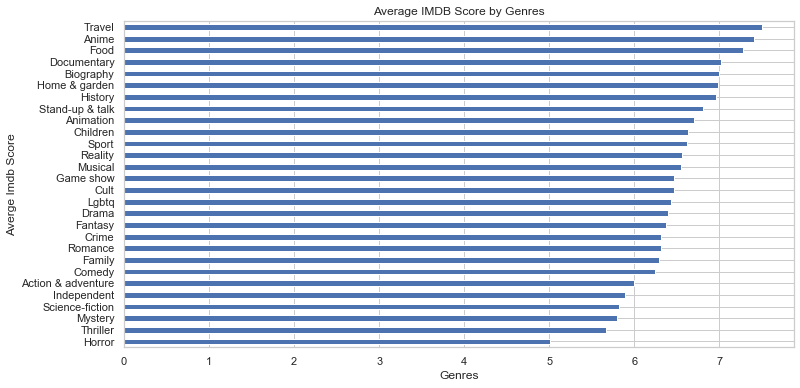

In [59]:
df_genre.loc[df_genre["genres"] != "Nan"].groupby('genres')['imdb_score'].mean().sort_values().plot.barh()
plt.title("Average IMDB Score by Genres")
plt.xlabel("Genres")
plt.ylabel('Averge Imdb Score')